In [16]:
from pyspark.sql import SparkSession
import pandas as pd

# Criação da sessão Spark
spark = SparkSession.builder.appName("Analise de Hábitos dos Alunos").getOrCreate()

# Leitura do arquivo CSV
df = spark.read.option("header", "true").option("inferSchema", "true").csv("E:/Mestrado UFCG/kaggle-habitos-dos-alunos-desempenho/dado/StudentPerformance.csv")

# Exibindo as primeiras 5 linhas
df.show(5)


+----------+---+------+-------------------+------------------+-------------+-------------+---------------------+-----------+------------+------------------+------------------------+----------------+--------------------+-----------------------------+----------+
|student_id|age|gender|study_hours_per_day|social_media_hours|netflix_hours|part_time_job|attendance_percentage|sleep_hours|diet_quality|exercise_frequency|parental_education_level|internet_quality|mental_health_rating|extracurricular_participation|exam_score|
+----------+---+------+-------------------+------------------+-------------+-------------+---------------------+-----------+------------+------------------+------------------------+----------------+--------------------+-----------------------------+----------+
|     S1000| 23|Female|                0.0|               1.2|          1.1|           No|                 85.0|        8.0|        Fair|                 6|                  Master|         Average|                   

### Exploaração

In [2]:
# Verificando o schema (tipos de dados) das colunas
df.printSchema()

# Contando o número de linhas e colunas
num_linhas = df.count()
num_colunas = len(df.columns)
print(f"Número de linhas: {num_linhas}")
print(f"Número de colunas: {num_colunas}")

# Visualizando os nomes das colunas
print("Colunas disponíveis:")
print(df.columns)


root
 |-- student_id: string (nullable = true)
 |-- age: integer (nullable = true)
 |-- gender: string (nullable = true)
 |-- study_hours_per_day: double (nullable = true)
 |-- social_media_hours: double (nullable = true)
 |-- netflix_hours: double (nullable = true)
 |-- part_time_job: string (nullable = true)
 |-- attendance_percentage: double (nullable = true)
 |-- sleep_hours: double (nullable = true)
 |-- diet_quality: string (nullable = true)
 |-- exercise_frequency: integer (nullable = true)
 |-- parental_education_level: string (nullable = true)
 |-- internet_quality: string (nullable = true)
 |-- mental_health_rating: integer (nullable = true)
 |-- extracurricular_participation: string (nullable = true)
 |-- exam_score: double (nullable = true)

Número de linhas: 1000
Número de colunas: 16
Colunas disponíveis:
['student_id', 'age', 'gender', 'study_hours_per_day', 'social_media_hours', 'netflix_hours', 'part_time_job', 'attendance_percentage', 'sleep_hours', 'diet_quality', 'ex

In [3]:
# Verificando o esquema dos dados e os tipos das colunas
df.printSchema()

# Mostrando estatísticas descritivas para variáveis numéricas
df.describe().show()

# Verificando a existência de valores nulos em cada coluna
from pyspark.sql.functions import col, count, isnan, when

# Soma de valores nulos por coluna
df.select([
    count(when(col(c).isNull() | isnan(c), c)).alias(c)
    for c in df.columns
]).show()


root
 |-- student_id: string (nullable = true)
 |-- age: integer (nullable = true)
 |-- gender: string (nullable = true)
 |-- study_hours_per_day: double (nullable = true)
 |-- social_media_hours: double (nullable = true)
 |-- netflix_hours: double (nullable = true)
 |-- part_time_job: string (nullable = true)
 |-- attendance_percentage: double (nullable = true)
 |-- sleep_hours: double (nullable = true)
 |-- diet_quality: string (nullable = true)
 |-- exercise_frequency: integer (nullable = true)
 |-- parental_education_level: string (nullable = true)
 |-- internet_quality: string (nullable = true)
 |-- mental_health_rating: integer (nullable = true)
 |-- extracurricular_participation: string (nullable = true)
 |-- exam_score: double (nullable = true)

+-------+----------+-----------------+------+-------------------+------------------+------------------+-------------+---------------------+------------------+------------+------------------+------------------------+----------------+----

### Frequência das variáveis categóricas

In [4]:
# Contando as frequências dos valores em colunas categóricas
categorical_columns = ['gender', 'part_time_job', 'diet_quality', 'parental_education_level', 
                       'internet_quality', 'extracurricular_participation']

for col_name in categorical_columns:
    print(f"\nDistribuição da coluna '{col_name}':")
    df.groupBy(col_name).count().show()



Distribuição da coluna 'gender':
+------+-----+
|gender|count|
+------+-----+
|Female|  481|
| Other|   42|
|  Male|  477|
+------+-----+


Distribuição da coluna 'part_time_job':
+-------------+-----+
|part_time_job|count|
+-------------+-----+
|           No|  785|
|          Yes|  215|
+-------------+-----+


Distribuição da coluna 'diet_quality':
+------------+-----+
|diet_quality|count|
+------------+-----+
|        Good|  378|
|        Fair|  437|
|        Poor|  185|
+------------+-----+


Distribuição da coluna 'parental_education_level':
+------------------------+-----+
|parental_education_level|count|
+------------------------+-----+
|             High School|  392|
|                    None|   91|
|                  Master|  167|
|                Bachelor|  350|
+------------------------+-----+


Distribuição da coluna 'internet_quality':
+----------------+-----+
|internet_quality|count|
+----------------+-----+
|         Average|  391|
|            Good|  447|
|           

###  Correlação de variáveis numéricas com exam_score

In [5]:
# Selecionando apenas as colunas numéricas
numeric_columns = ['age', 'study_hours_per_day', 'social_media_hours', 'netflix_hours',
                   'attendance_percentage', 'sleep_hours', 'exercise_frequency', 
                   'mental_health_rating', 'exam_score']

# Convertendo para Pandas para calcular correlação facilmente
df_pandas = df.select(numeric_columns).toPandas()

# Calculando a correlação com 'exam_score'
correlations = df_pandas.corr(numeric_only=True)['exam_score'].sort_values(ascending=False)
print("\nCorrelação das variáveis numéricas com 'exam_score':\n")
print(correlations)



Correlação das variáveis numéricas com 'exam_score':

exam_score               1.000000
study_hours_per_day      0.825419
mental_health_rating     0.321523
exercise_frequency       0.160107
sleep_hours              0.121683
attendance_percentage    0.089836
age                     -0.008907
social_media_hours      -0.166733
netflix_hours           -0.171779
Name: exam_score, dtype: float64


### Interpretação da Correlação com a Nota dos Alunos (`exam_score`)

A análise de correlação revelou que o fator mais fortemente associado ao desempenho dos alunos é o tempo dedicado aos estudos por dia (`study_hours_per_day`), com uma correlação positiva de **0.83**. Isso indica que quanto mais o aluno estuda, maior tende a ser sua nota no exame. Outros fatores com correlação positiva, embora mais fraca, incluem a saúde mental (`mental_health_rating` com 0.32), frequência de exercícios físicos (`exercise_frequency` com 0.16), horas de sono (`sleep_hours` com 0.12) e porcentagem de presença nas aulas (`attendance_percentage` com 0.09). 

Por outro lado, algumas variáveis mostraram correlação negativa com o desempenho. O tempo gasto em redes sociais (`social_media_hours`) e assistindo Netflix (`netflix_hours`) apresentaram correlações de aproximadamente **-0.17**, sugerindo que o excesso de tempo nessas atividades pode prejudicar a performance acadêmica. A variável `age` teve correlação praticamente nula (-0.009), indicando que a idade dos estudantes não influencia significativamente suas notas.

Esses resultados sugerem que hábitos saudáveis e dedicação aos estudos são elementos-chave para um melhor desempenho acadêmico, enquanto o uso excessivo de mídias de entretenimento pode ser um fator limitante.


###  Distribuição das Variáveis Numéricas

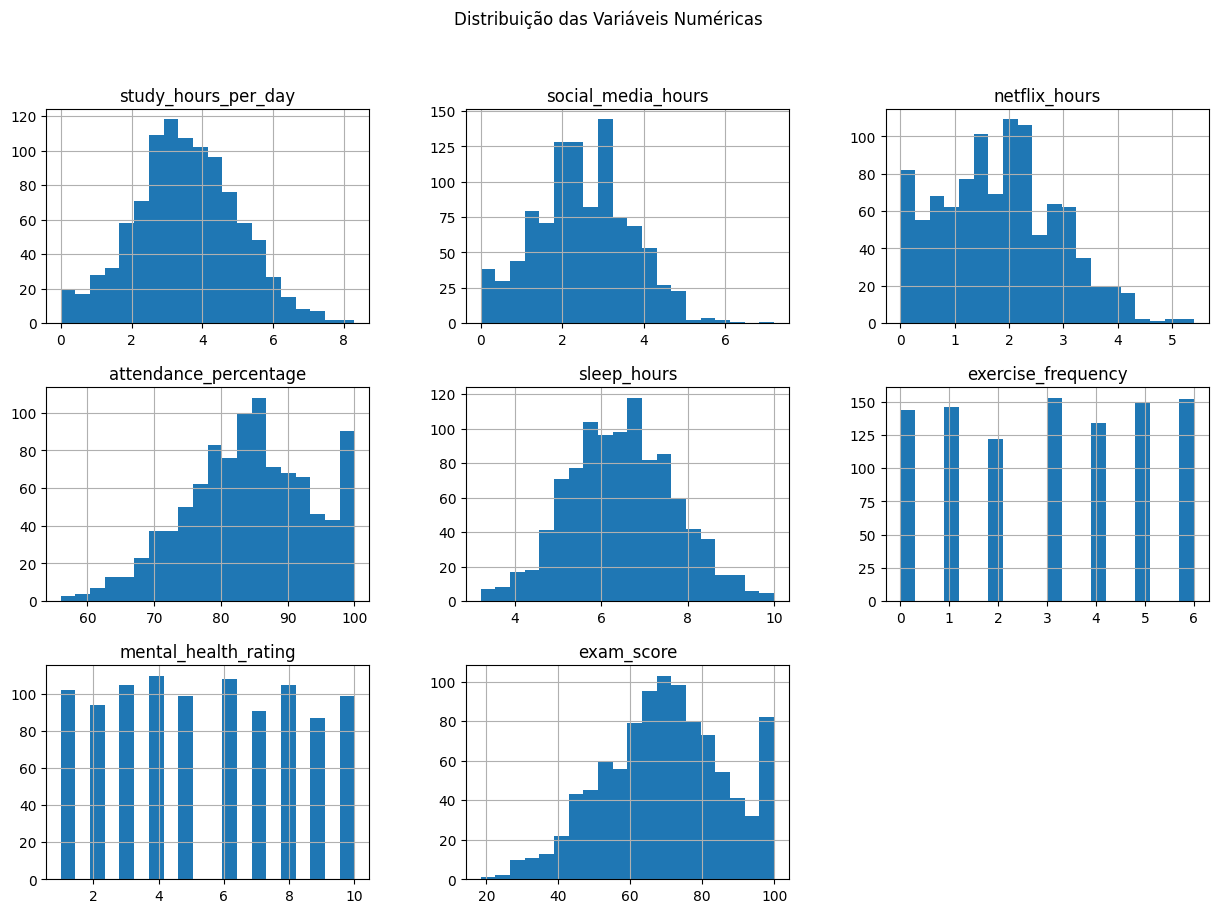

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Exibindo a distribuição das variáveis numéricas
numerical_cols = ['study_hours_per_day', 'social_media_hours', 'netflix_hours', 'attendance_percentage', 'sleep_hours', 'exercise_frequency', 'mental_health_rating', 'exam_score']
df.select(numerical_cols).toPandas().hist(bins=20, figsize=(15,10))
plt.suptitle("Distribuição das Variáveis Numéricas")
plt.show()


### Boxplots para Identificar Outliers

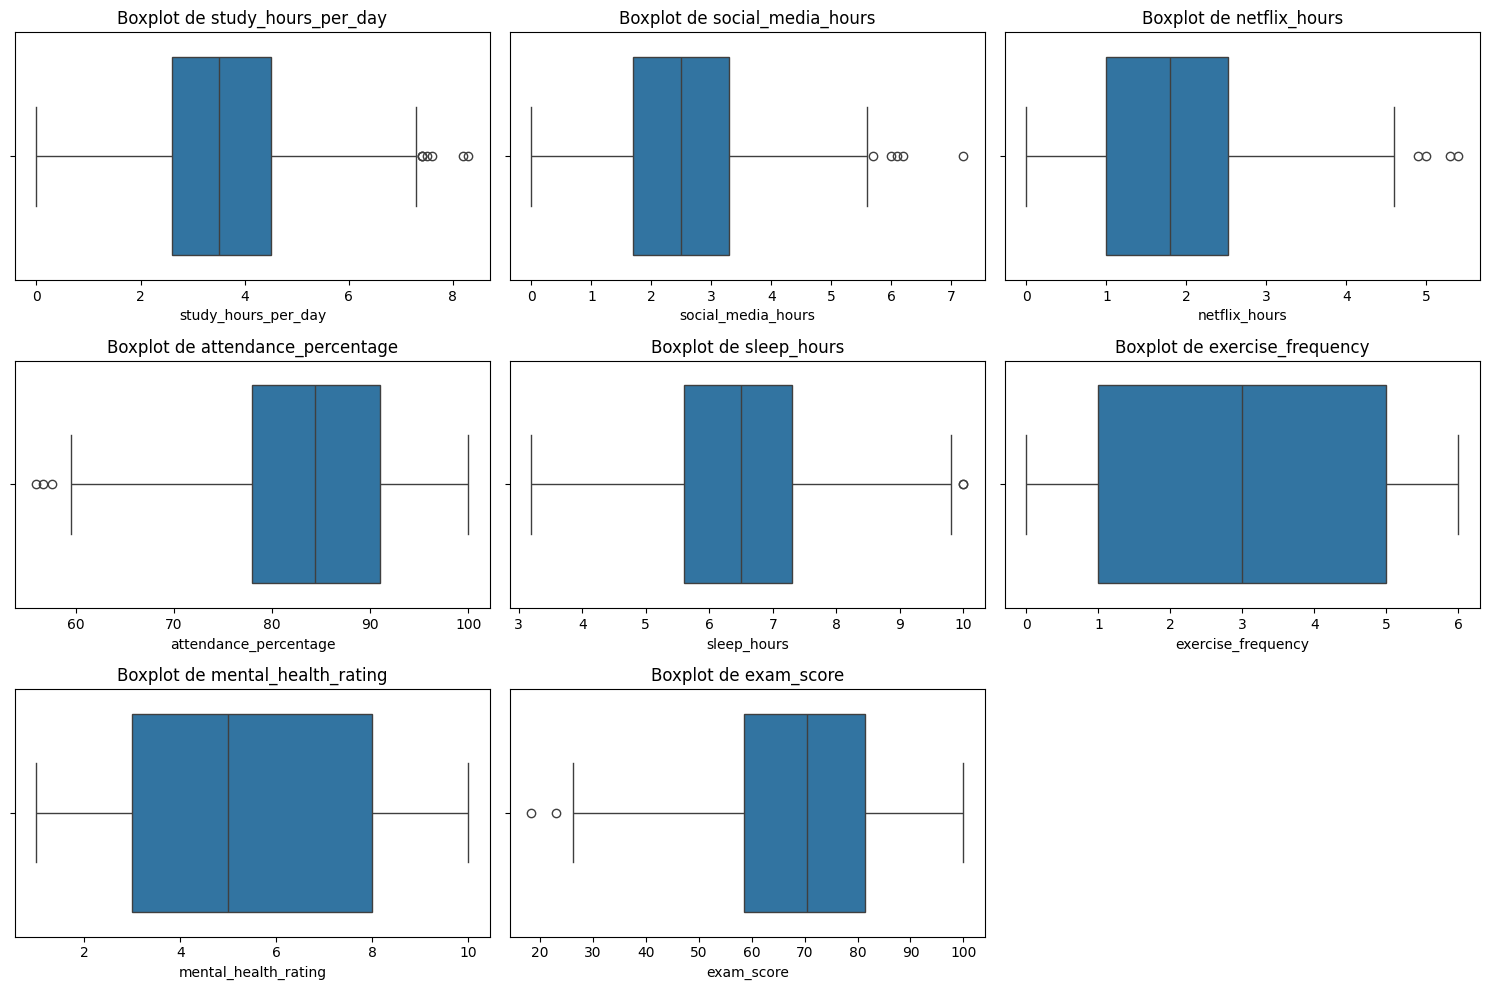

In [7]:
# Criando boxplots para cada variável numérica
plt.figure(figsize=(15,10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(data=df.toPandas(), x=col)
    plt.title(f"Boxplot de {col}")
plt.tight_layout()
plt.show()


### Análise das Variáveis Categóricas

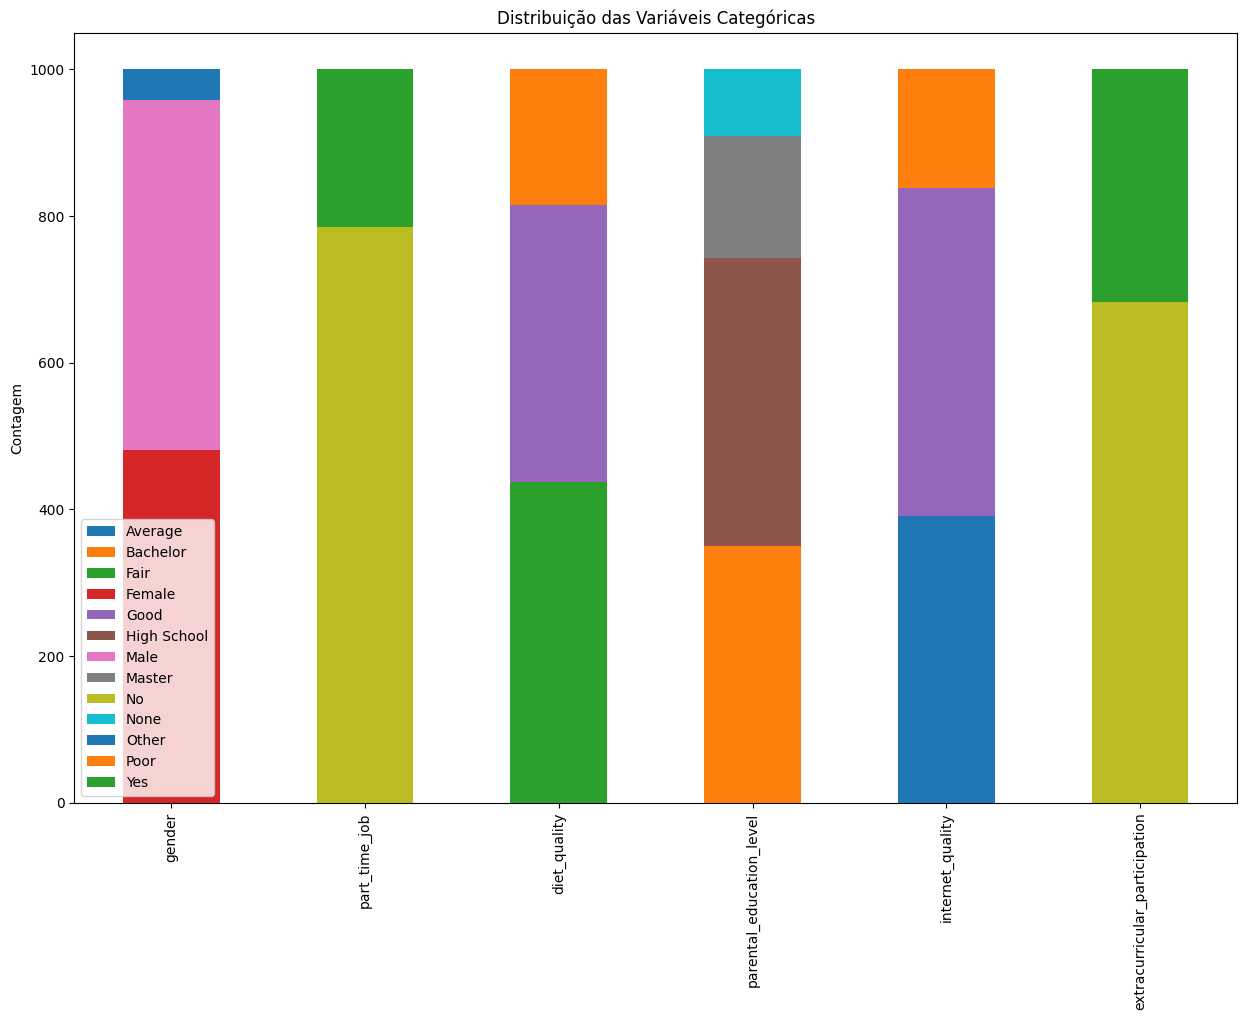

In [8]:
# Exibindo as distribuições das variáveis categóricas
categorical_cols = ['gender', 'part_time_job', 'diet_quality', 'parental_education_level', 'internet_quality', 'extracurricular_participation']
df.select(categorical_cols).toPandas().apply(lambda x: x.value_counts()).T.plot(kind='bar', stacked=True, figsize=(15,10))
plt.title("Distribuição das Variáveis Categóricas")
plt.ylabel("Contagem")
plt.show()


### Correlação entre Variáveis Categóricas e exam_score

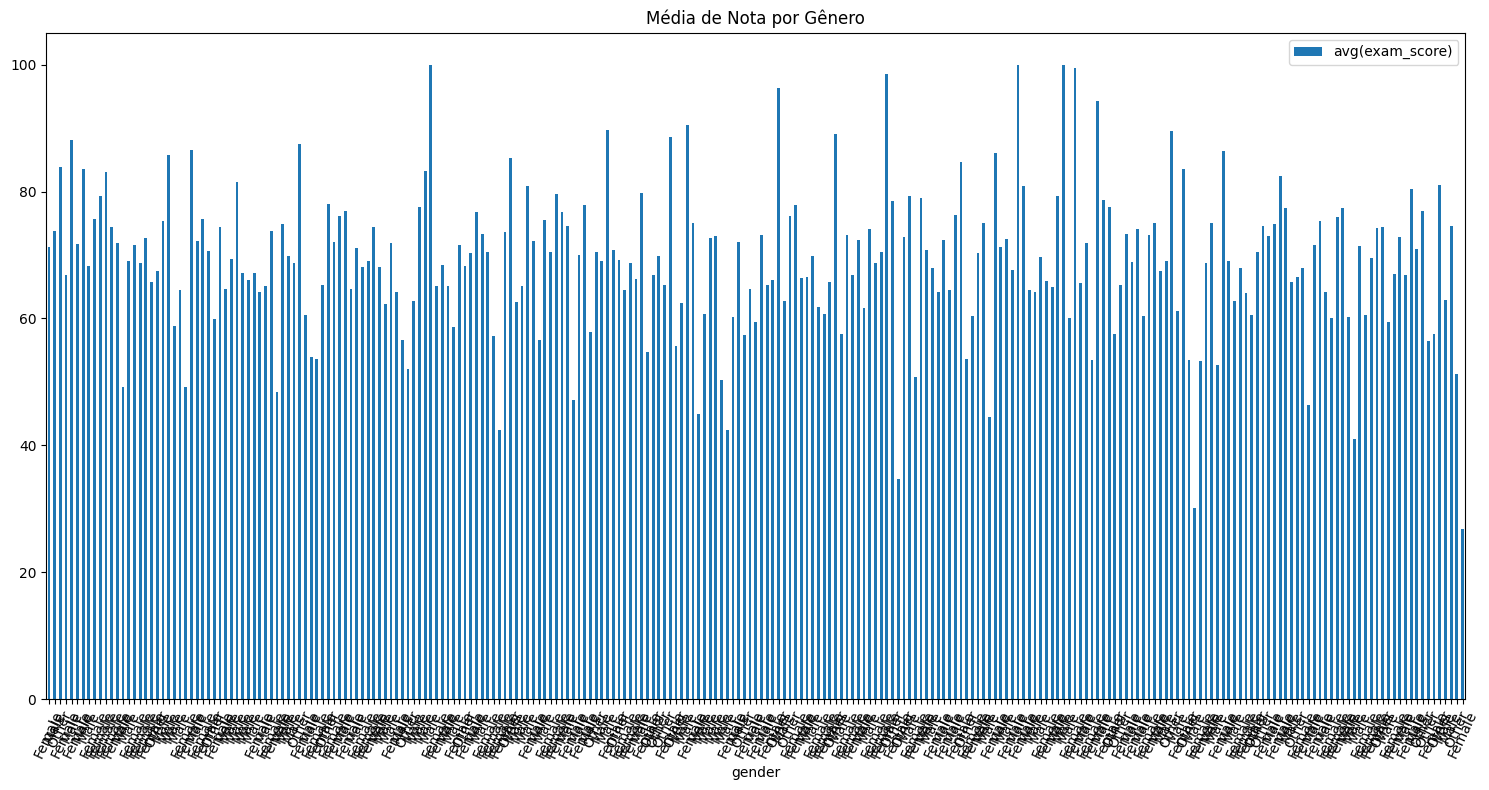

In [15]:
# Exibindo o gráfico com os rótulos do eixo X girados
df_grouped.plot(kind='bar', x='gender', y='avg(exam_score)', figsize=(15,8), title="Média de Nota por Gênero")
plt.xticks(rotation=65)  # Girando os rótulos no eixo X
plt.tight_layout()  # Ajusta o layout para evitar sobreposição
plt.show()


###  Análise de Correlação com Variáveis Categóricas

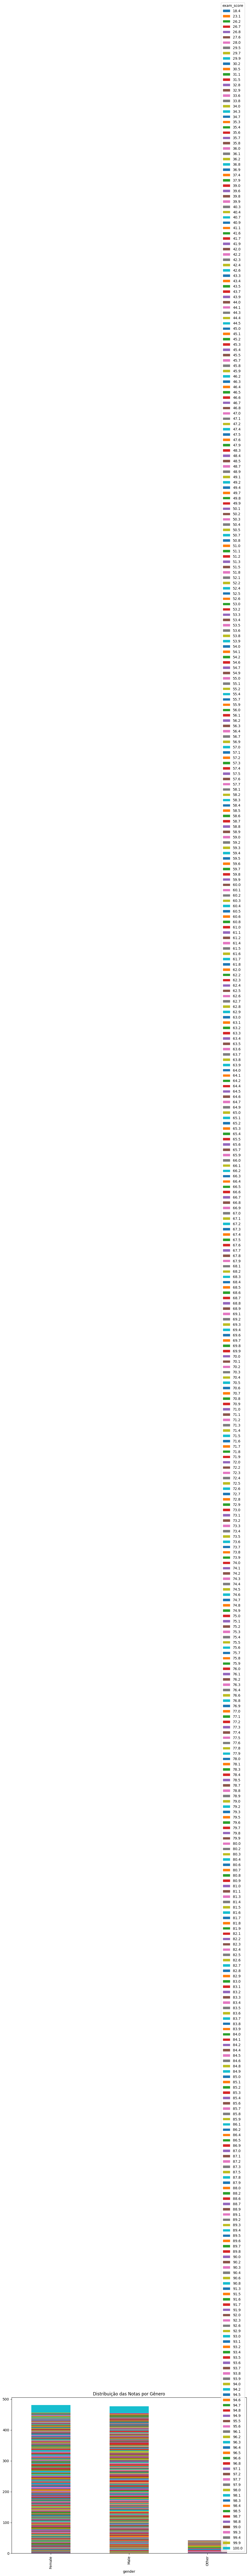

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Convertendo o DataFrame do PySpark para Pandas
df_pandas = df.select('gender', 'exam_score').toPandas()

# Contagem cruzada entre variáveis categóricas e exam_score
contingency_table = pd.crosstab(df_pandas['gender'], df_pandas['exam_score'])

# Plotando gráfico de barras
contingency_table.plot(kind='bar', figsize=(12,8), stacked=True, title="Distribuição das Notas por Gênero")
plt.show()


### Distribuição de exam_score

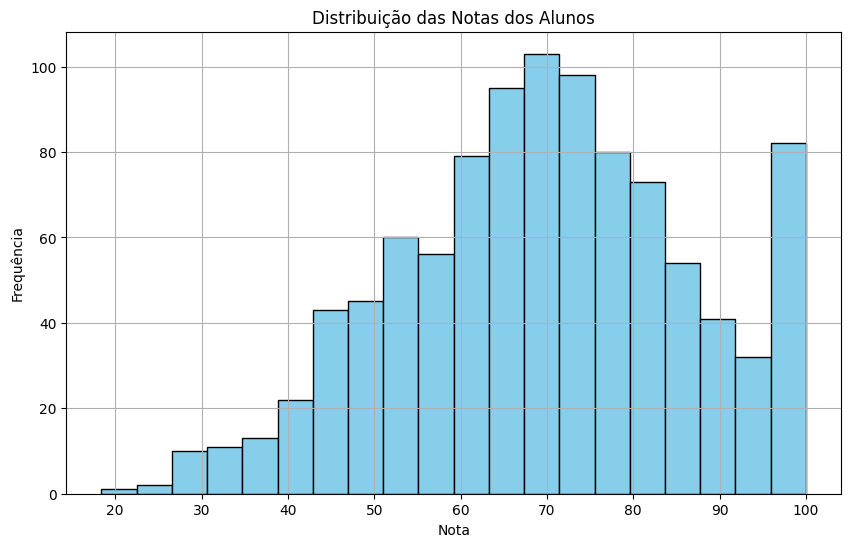

In [20]:
# Histograma para exam_score
df.select('exam_score').toPandas()['exam_score'].hist(bins=20, figsize=(10,6), color='skyblue', edgecolor='black')
plt.title('Distribuição das Notas dos Alunos')
plt.xlabel('Nota')
plt.ylabel('Frequência')
plt.show()


### Análise de attendance_percentage e exam_score

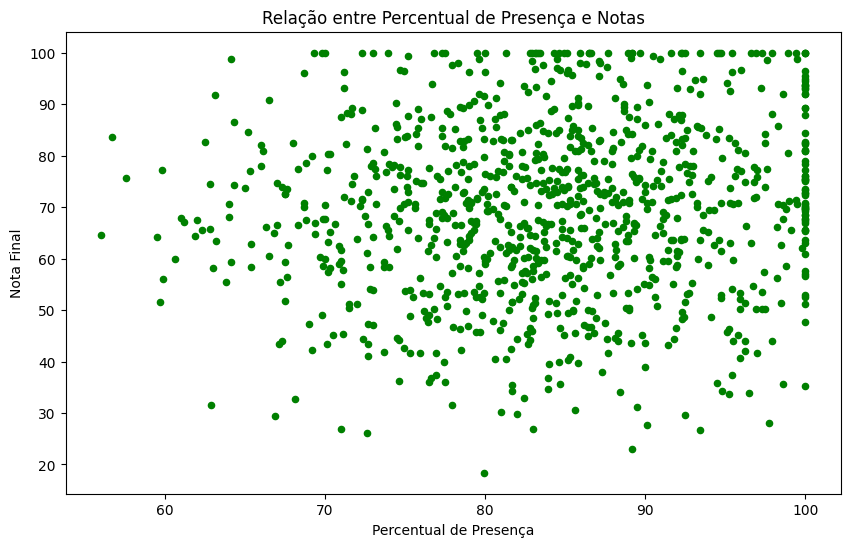

In [21]:
# Scatter plot para exam_score vs attendance_percentage
df.select('attendance_percentage', 'exam_score').toPandas().plot(kind='scatter', 
                                                                  x='attendance_percentage', 
                                                                  y='exam_score', 
                                                                  figsize=(10,6), 
                                                                  color='green')
plt.title('Relação entre Percentual de Presença e Notas')
plt.xlabel('Percentual de Presença')
plt.ylabel('Nota Final')
plt.show()


### Comparação das médias de exam_score por diferentes níveis de parental_education_level

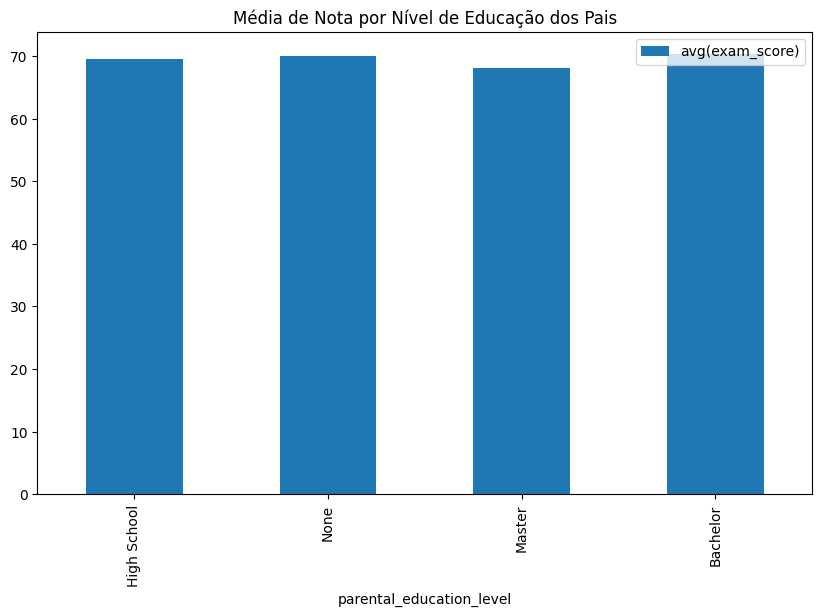

In [22]:
# Calculando a média de exam_score para cada categoria de parental_education_level
df_grouped_education = df.groupBy('parental_education_level').agg({'exam_score': 'avg'}).toPandas()

# Exibindo o gráfico de barras
df_grouped_education.plot(kind='bar', x='parental_education_level', y='avg(exam_score)', figsize=(10,6), title="Média de Nota por Nível de Educação dos Pais")
plt.show()


###  Correlação entre variáveis numéricas

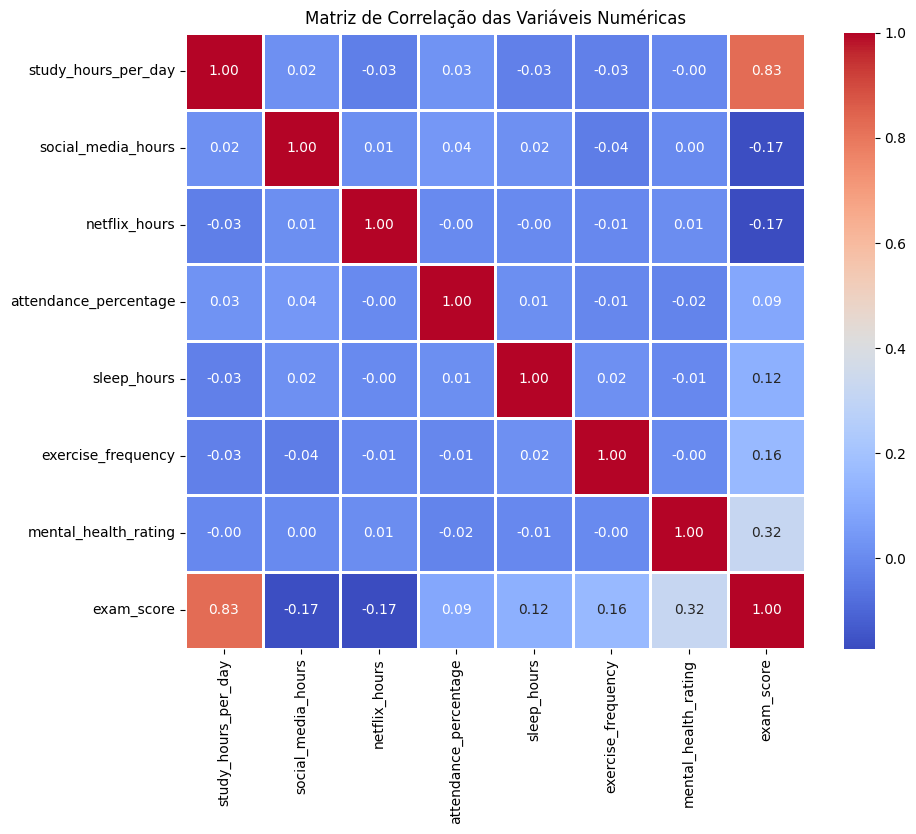

In [23]:
# Calculando a correlação entre variáveis numéricas
corr_matrix = df.select('study_hours_per_day', 'social_media_hours', 'netflix_hours', 'attendance_percentage', 
                        'sleep_hours', 'exercise_frequency', 'mental_health_rating', 'exam_score').toPandas().corr()

# Plotando a matriz de correlação
import seaborn as sns
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=1)
plt.title('Matriz de Correlação das Variáveis Numéricas')
plt.show()


### Análise de study_hours_per_day e exam_score por Gênero

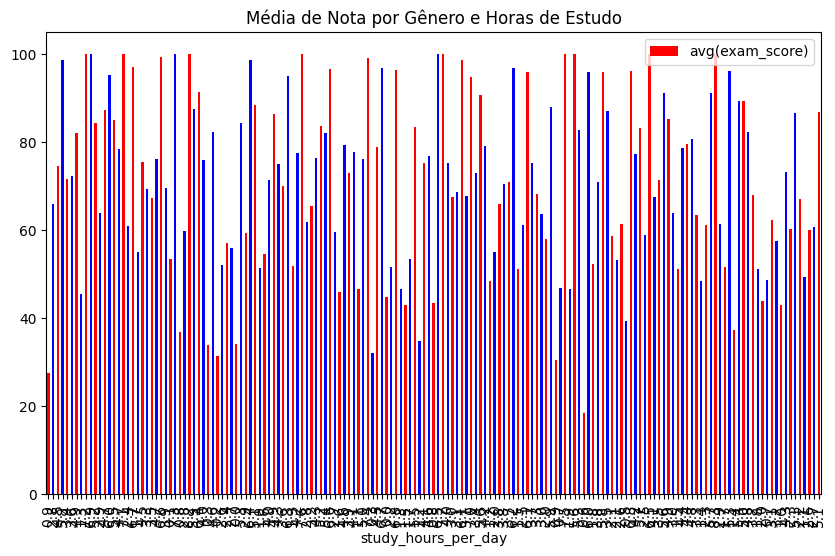

In [24]:
# Calculando a média de exam_score por gênero e study_hours_per_day
df_grouped_gender_study = df.groupBy('gender', 'study_hours_per_day').agg({'exam_score': 'avg'}).toPandas()

# Plotando gráfico de barras
df_grouped_gender_study.plot(kind='bar', x='study_hours_per_day', y='avg(exam_score)', 
                             figsize=(10,6), title="Média de Nota por Gênero e Horas de Estudo", 
                             color=['red', 'blue'])
plt.show()


### Contagem de alunos por faixa de horas de estudo

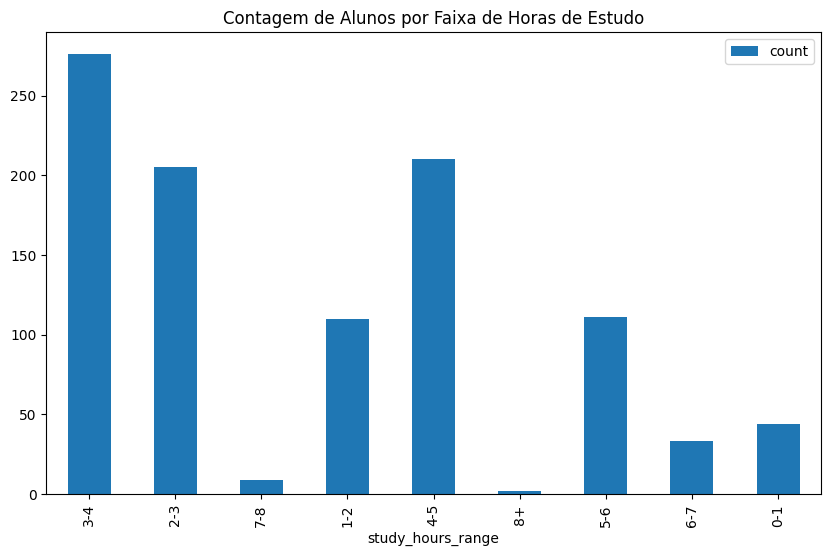

In [26]:
from pyspark.sql import functions as F

# Criando faixas para as horas de estudo
bins = [0, 1, 2, 3, 4, 5, 6, 7, 8]
labels = ['0-1', '1-2', '2-3', '3-4', '4-5', '5-6', '6-7', '7-8']

# Usando a função 'udf' para criar uma coluna de faixa de horas de estudo
df = df.withColumn('study_hours_range', 
                   F.when(df['study_hours_per_day'] <= 1, '0-1')
                    .when((df['study_hours_per_day'] > 1) & (df['study_hours_per_day'] <= 2), '1-2')
                    .when((df['study_hours_per_day'] > 2) & (df['study_hours_per_day'] <= 3), '2-3')
                    .when((df['study_hours_per_day'] > 3) & (df['study_hours_per_day'] <= 4), '3-4')
                    .when((df['study_hours_per_day'] > 4) & (df['study_hours_per_day'] <= 5), '4-5')
                    .when((df['study_hours_per_day'] > 5) & (df['study_hours_per_day'] <= 6), '5-6')
                    .when((df['study_hours_per_day'] > 6) & (df['study_hours_per_day'] <= 7), '6-7')
                    .when((df['study_hours_per_day'] > 7) & (df['study_hours_per_day'] <= 8), '7-8')
                    .otherwise('8+'))

# Contagem de alunos por faixa de horas de estudo
df_grouped_study_hours = df.groupBy('study_hours_range').count().toPandas()

# Plotando gráfico de barras
df_grouped_study_hours.plot(kind='bar', x='study_hours_range', y='count', figsize=(10,6), title="Contagem de Alunos por Faixa de Horas de Estudo")
plt.show()


### Distribuição de notas por participação extracurricular

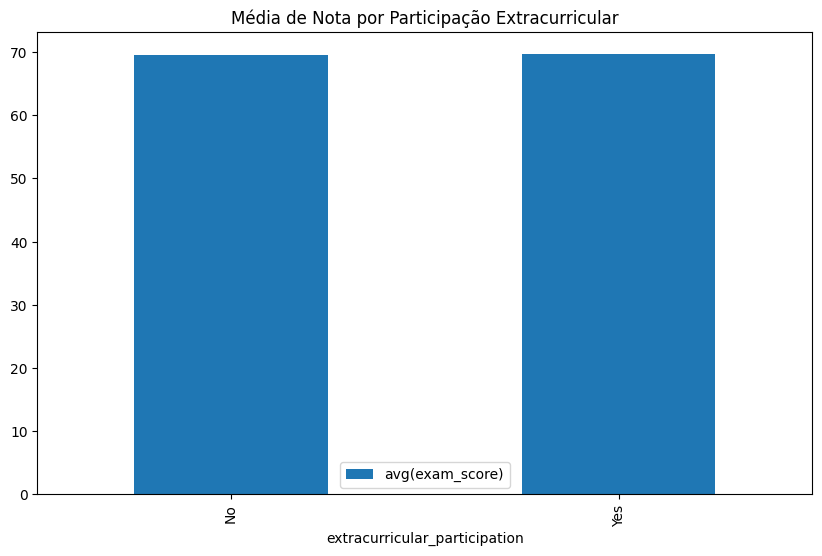

In [27]:
# Média de exam_score por participação extracurricular
df_grouped_extracurricular = df.groupBy('extracurricular_participation').agg({'exam_score': 'avg'}).toPandas()

# Plotando o gráfico de barras
df_grouped_extracurricular.plot(kind='bar', x='extracurricular_participation', y='avg(exam_score)', figsize=(10,6), title="Média de Nota por Participação Extracurricular")
plt.show()
